*******裁剪完成图片********


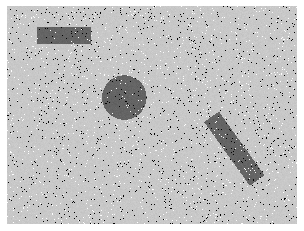

*******将图片灰度化********
*******将图片二值化********


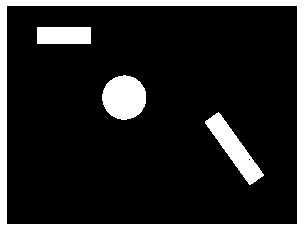

*******创建二值化图像窗口********
*******寻找轮廓********


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
def show(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()
image=cv2.imread("./010.png")
image1=image[200:2144,200:2792]
print("*******裁剪完成图片********")
show(image1)
# image1 = cv2.cvtColor(image1,cv2.COLOR_RGB2BGR)
# #image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image1.shape
sp = image1.shape 
height = sp[0]  
width = sp[1] 
new = np.zeros((height,width,3), np.uint8)
print("*******将图片灰度化********")
for i in range(height):   
    for j in range(width):   
        new[i,j] = 0.3 * image1[i,j][0] + 0.59 * image1[i,j][1] + 0.11 * image1[i,j][2]   
img_gauss=cv2.GaussianBlur(image1,(7,7),0)
ret, binary = cv2.threshold(img_gauss,127,255, cv2.THRESH_BINARY_INV)
print("*******将图片二值化********")
show(binary)
# 闭运算
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
print("*******创建二值化图像窗口********")
# cv2.namedWindow("closing",cv2.WINDOW_NORMAL)
# cv2.imshow("closing", closing)

closing = cv2.cvtColor(closing,cv2.COLOR_BGR2GRAY)
shapes = {'triangle': 0, 'rectangle': 0, 'polygons': 0, 'circles': 0}
print("*******寻找轮廓********")
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [2]:
cv2.__version__

'4.2.0'